In [6]:
# Import pandas for data manipulation and analysis
import pandas as pd
# Import matplotlib's pyplot to plot graphs
import matplotlib.pyplot as plt
# Import AgglomerativeClustering for hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler
# Import scipy's hierarchy for dendrogram visualization
import scipy.cluster.hierarchy as sch

In [8]:
# Load dataset from a CSV file into a pandas DataFrame
flakes_df = pd.read_csv('StoneFlakes_clean.csv')

In [9]:
# Remove non-numeric columns from the DataFrame for clustering
# drop the non-numeric column
# Remove non-numeric columns from the DataFrame for clustering
flakes_df.drop(columns='ID', inplace=True)


flakes_df

,LBI,RTI,WDI,FLA,PSF,FSF,ZDF1,PROZD
0,1.23,27.0,3.59,122,0.0,40.0,40.0,30
1,1.24,26.5,2.90,121,16.0,20.7,29.7,72
2,1.07,29.1,3.10,114,44.0,2.6,26.3,68
3,1.08,43.7,2.40,105,32.6,5.8,10.7,42
4,1.39,29.5,2.78,126,14.0,0.0,50.0,78
...,...,...,...,...,...,...,...,...
68,1.04,30.4,2.70,118,33.3,5.1,28.2,66
69,1.14,31.9,2.07,121,15.0,10.0,5.0,47
70,1.24,27.2,3.00,120,29.1,13.8,34.4,70
71,1.15,38.0,2.25,125,9.5,6.4,13.0,88


In [10]:
# Initialize the StandardScaler object.
# StandardScaler standardizes features by removing the mean and scaling to unit variance.
# This is important to ensure that all features contribute equally to the result and 
# improves the convergence of the clustering algorithm.
scaler = StandardScaler()

# The fit_transform() method first fits the scaler to the data by calculating the mean and 
# standard deviation for each feature. After fitting, it transforms the data by subtracting 
# the mean and dividing by the standard deviation, effectively standardizing the dataset.
# This method returns the transformed dataset with standardized features.
scaler.fit_transform(flakes_df)

array([[ 1.82326796e-01, -2.15289653e-01,  8.47104586e-01,
         8.26954328e-01, -1.11585619e+00,  1.89814564e+00,
        -1.47928757e-01, -2.91863354e+00],
       [ 2.64486401e-01, -3.16047087e-01, -3.07975490e-01,
         6.47288655e-01, -4.77473766e-04,  2.30981876e-01,
        -5.78209731e-01, -1.73685554e-01],
       [-1.13222689e+00,  2.07891572e-01,  2.68303293e-02,
        -6.10371051e-01,  1.95143528e+00, -1.33252403e+00,
        -7.20244228e-01, -4.35109172e-01],
       [-1.05006729e+00,  3.15000866e+00, -1.14499004e+00,
        -2.22736210e+00,  1.15672795e+00, -1.05610310e+00,
        -1.37193192e+00, -2.13436269e+00],
       [ 1.49688048e+00,  2.88497520e-01, -5.08858981e-01,
         1.54561702e+00, -1.39899814e-01, -1.55711604e+00,
         2.69819763e-01,  2.18449872e-01],
       [ 8.39603639e-01, -3.56350061e-01, -1.64719877e+00,
         2.87957311e-01, -2.13908247e-02, -2.00925833e-01,
        -5.48967335e-01, -1.73685554e-01],
       [ 5.10965218e-01, -9.438073

In [5]:
# Generate a linkage matrix using the 'complete' linkage method on the dataset.
# The 'complete' linkage method computes the maximum distance between clusters before merging.
# This linkage_matrix will be used to visualize the dendrogram and understand the cluster distances.
# 'sch.linkage()' computes hierarchical clustering based on the provided distance metric, in this case, the maximum distance.
# 'flakes_df' is the DataFrame containing the dataset to be clustered.
# The linkage matrix contains the hierarchical clustering information, necessary for plotting a dendrogram or for further analysis.

linkage_matrix = sch.linkage(flakes_df, method='complete')

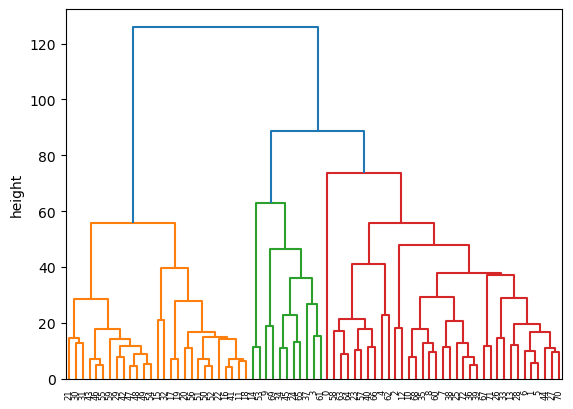

In [9]:
# Generate and plot a dendrogram using the linkage matrix.
# The dendrogram visually represents the arrangement of the clusters produced by the hierarchical clustering.
# `sch.dendrogram` function from scipy's hierarchy module takes a linkage matrix (an array of shape [n-1, 4])
# where 'n' is the number of observations. This matrix contains the hierarchical clustering information,
# allowing us to visualize the tree structure (hierarchical relationships) among the data points.
dendrogram = sch.dendrogram(linkage_matrix)

# Label the y-axis of the plot
plt.ylabel('height')

# Save the current figure to a file named 'dendrogram.png' with a resolution of 300 dots per inch (dpi).
plt.savefig('dendrogram.png', dpi=300)

In [10]:
# Initialize the AgglomerativeClustering model with 4 clusters and 'complete' linkage method.
# The 'complete' linkage method considers the maximum distance between observations of pairs of clusters.
cluster = AgglomerativeClustering(n_clusters=4, linkage='complete')

# Fit the AgglomerativeClustering model to the data contained in 'flakes_df' and predict the cluster
# index for each sample. This step involves the model learning the hierarchies and assigning each
# sample in 'flakes_df' to one of the 4 clusters based on the distance between them and using
# the complete linkage method to measure distance.
cluster_preds = cluster.fit_predict(flakes_df)

# Print the cluster indices assigned to each sample in 'flakes_df'. This output shows which cluster
# each sample belongs to, with cluster indices ranging from 0 to 3 since we specified 4 clusters.
print(cluster_preds)

[3 2 2 0 2 2 2 2 2 0 2 1 2 2 0 1 1 1 1 1 1 1 1 2 0 2 2 2 2 1 1 1 1 2 0 2 2
 0 2 2 2 1 1 1 2 0 1 1 1 1 1 1 1 0 1 1 1 2 2 1 2 0 2 2 2 0 2 2 2 0 2 2 2]
